Yogesh Harlalka <BR>
20BCE1696 <BR>
VIT CHENNAI <BR>
Assignment 2

1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.<br>
● Univariate Analysis<BR>
● Bi - Variate Analysis<BR>
● Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [3]:
# 2. Load the dataset
df = pd.read_csv('titanic.csv')

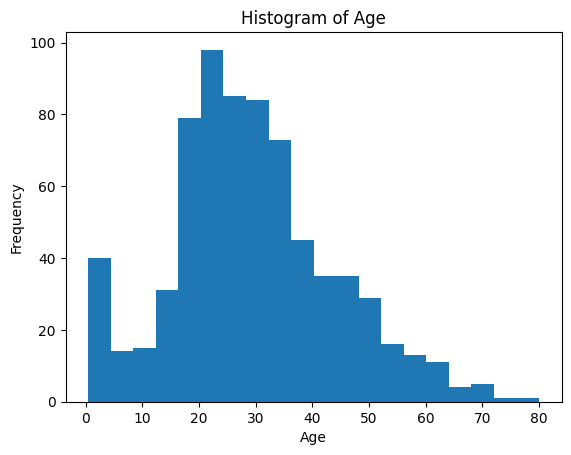

In [4]:
# 3.a Univariate Analysis
# Histogram of 'Age'
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

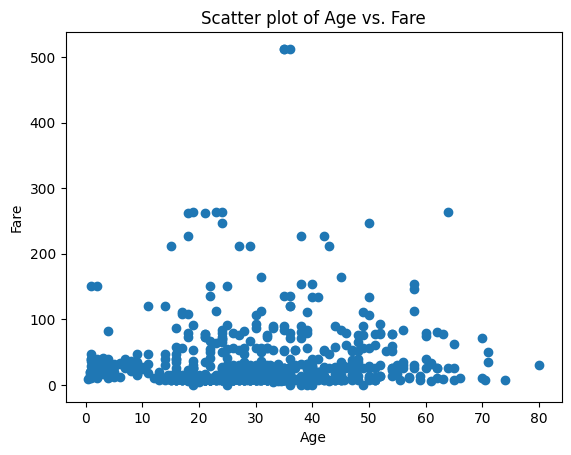

In [5]:
# 3.b Bi-Variate Analysis
# Scatter plot of 'Age' vs. 'Fare'
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age vs. Fare')
plt.show()

<ipython-input-6-fe7950af9597>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


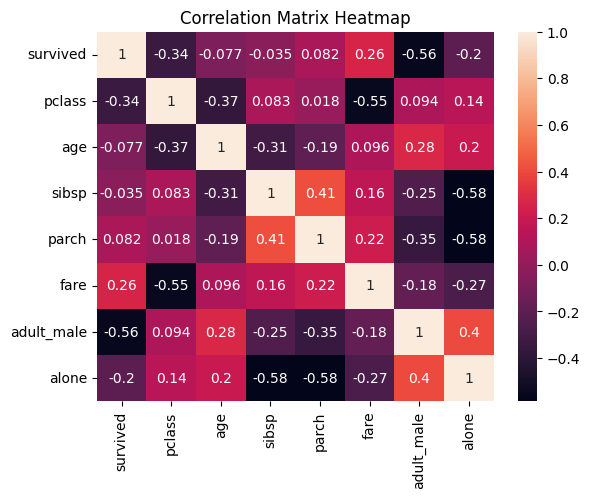

In [6]:
# 3.c Multi-Variate Analysis
# Heatmap of correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
# 4. Perform descriptive statistics on the dataset
descriptive_stats = df.describe()
print(descriptive_stats)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   17.383622
std      0.486592    0.836071   13.002015    1.102743    0.806057   12.713016
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   24.150000
max      1.000000    3.000000   80.000000    8.000000    6.000000   65.000000


In [40]:
# 5. Handle missing values
# Replace missing values in 'Age' with the mean
df['age'].fillna(df['age'].mean(), inplace=True)
print("Summary of DataFrame:")
print(df.info())

Summary of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [25]:
# 6. Find the outliers and replace the outliers
# Replace outliers in 'Fare' with the median
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['fare'] = df['fare'].apply(lambda x: df['fare'].median() if x < lower_bound or x > upper_bound else x)

In [30]:
# 7. Check for Categorical columns and perform encoding
# Example: Encoding the 'Sex' column using one-hot encoding
df['sex'].fillna('Unknown', inplace=True)  # Handle missing values in 'Sex' column
df_encoded = pd.get_dummies(df, columns=['sex'])

In [31]:
# 8. Split the data into dependent and independent variables
X = df_encoded.drop('survived', axis=1)
Y = df_encoded['survived']
X

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,3,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,38.000000,1,0,14.4542,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,3,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,35.000000,1,0,14.4542,S,First,woman,False,C,Southampton,yes,False,1,0
4,3,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,1
887,1,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0
888,3,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,0
889,1,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,1


In [35]:
# 9. Scale the independent variables
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X_scaled

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0.827377,-0.592481,0.432793,-0.473674,-0.890262,S,Third,man,True,NaN,Southampton,no,False,0,1
1,-1.566107,0.638789,0.432793,-0.473674,-0.082858,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.814612,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,-1.566107,0.407926,0.432793,-0.473674,-0.082858,S,First,woman,False,C,Southampton,yes,False,1,0
4,0.827377,0.407926,-0.474545,-0.473674,-0.800603,S,Third,man,True,NaN,Southampton,no,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.245836,S,Second,man,True,NaN,Southampton,no,True,0,1
887,-1.566107,-0.823344,-0.474545,-0.473674,1.659425,S,First,woman,False,B,Southampton,yes,True,1,0
888,0.827377,0.000000,0.432793,2.008933,0.925339,S,Third,woman,False,NaN,Southampton,no,False,1,0
889,-1.566107,-0.284663,-0.474545,-0.473674,1.659425,C,First,man,True,C,Cherbourg,yes,True,0,1


In [39]:
# 10. Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train Data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTest Data:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Train Data:
X_train shape: (712, 15)
y_train shape: (712,)

Test Data:
X_test shape: (179, 15)
y_test shape: (179,)
